# DecisionTree

Este notebook foi revisado na aula do dia 19/10/2024. Foi construido a partir do notebook de referência [DecisionTree](../notebooks_referencia/DecisionTree.ipynb)

References

    [1] https://medium.com/machine-learning-beyond-deep-learning/%C3%A1rvores-de-decis%C3%A3o-3f52f6420b69

    [2] https://towardsdatascience.com/decision-tree-classification-de64fc4d5aac

    [3] https://www.datacamp.com/community/tutorials/decision-tree-classification-python

### Load libraries

In [5]:
import pandas as pd

# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Import train_test_split function
from sklearn.model_selection import train_test_split

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

### Load dataset


In [2]:
from sklearn.datasets import load_iris #, load_breast_cancer

iris = load_iris()

In [3]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
X = pd.DataFrame(data=iris.data,
                 columns=iris.feature_names)

y = pd.DataFrame(data=iris.target, columns=['CLASS'])

In [6]:
X.shape, y.shape

((150, 4), (150, 1))

### Splitting Data

To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

Let's split the dataset by using function train_test_split(). You need to pass 3 parameters features, target, and test_set size.

In [7]:
# 70% training and 30% test
X_train, X_test, \
y_train, y_test = train_test_split(X, y, test_size=0.3)

In [8]:
print('Original: ', X.shape, y.shape,
      '\nTrain:    ',  X_train.shape, y_train.shape,
      '\nTest:      ', X_test.shape, y_test.shape
)

Original:  (150, 4) (150, 1) 
Train:     (105, 4) (105, 1) 
Test:       (45, 4) (45, 1)


### Building Decision Tree Model

Let's create a Decision Tree Model using Scikit-learn.

In [9]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

In [10]:
# Train Decision Tree Classifer
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [11]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

### Evaluating Model

Let's estimate, how accurately the classifier or model can predict the type of cultivars.

Accuracy can be computed by comparing actual test set values and predicted values.



In [12]:
print("Accuracy:", metrics.accuracy_score(y_train, clf.predict(X_train)))

Accuracy: 1.0


In [13]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, clf.predict(X_test)))

Accuracy: 0.9333333333333333


### Manual Test

In [14]:
X_single = [[6.6, 3.0, 4.4, 1.4]]
clf.predict(X_single)

/home/sandro/.local/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

Finding wrong predictions

In [15]:
err = (y_pred != y_test['CLASS'])

print('Predicted:\n', y_pred[err], '\n\n',
      'Real:\n', y_test[err])

Predicted:
 [1 2 2] 

 Real:
      CLASS
129      2
57       1
70       1


---

### Visualizing Decision Trees

You can use Scikit-learn's export_graphviz function for display the tree within a Jupyter notebook.

***
For plotting tree, you also may need to install graphviz and pydotplus.

`pip install graphviz`

`pip install pydotplus`

***

export_graphviz function converts decision tree classifier into dot file and pydotplus convert this dot file to png or displayable form on Jupyter.

In [17]:
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO
from six import StringIO

from IPython.display import Image
import pydotplus

In [18]:
import numpy as np
1/8 * (-np.log2(1/8))

0.375

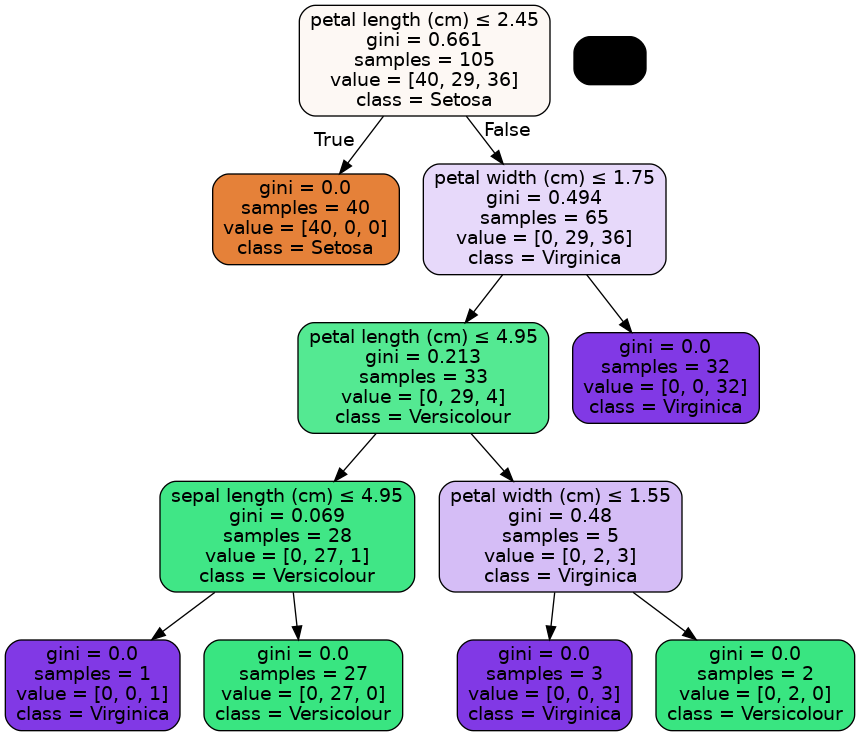

In [20]:
target_names  = ['Setosa', 'Versicolour', 'Virginica']

dot_data = StringIO()

export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,
                feature_names = X.columns,
                class_names   = target_names)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

#graph.write_png('iris.png')
Image(graph.create_png())

In the decision tree chart, each internal node has a decision rule that splits the data. **Gini** referred as ***Gini ratio***, which measures the *impurity* of the node. You can say a **node is pure when all of its records belong to the same class**, such nodes known as the leaf node.

Here, the resultant tree is unpruned. This unpruned tree is unexplainable and not easy to understand. In the next section, let's optimize it by pruning.

### Optimizing Decision Tree Performance

**criterion** : optional (default=”gini”) or Choose attribute selection measure: This parameter allows us to use the different-different attribute selection measure. Supported criteria are “gini” for the Gini index and “entropy” for the information gain.

**splitter** : string, optional (default=”best”) or Split Strategy: This parameter allows us to choose the split strategy. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

**max_depth** : int or None, optional (default=None) or Maximum Depth of a Tree: The maximum depth of the tree. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples. The *higher value* of maximum depth causes *overfitting*, and a *lower value* causes *underfitting* ([Source](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)).

In Scikit-learn, optimization of decision tree classifier performed by only pre-pruning. Maximum depth of the tree can be used as a control variable for pre-pruning. In the following the example, you can plot a decision tree on the same data with max_depth=3. Other than pre-pruning parameters, You can also try other attribute selection measure such as entropy.

In [21]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=2)

# Train Decision Tree Classifer
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556


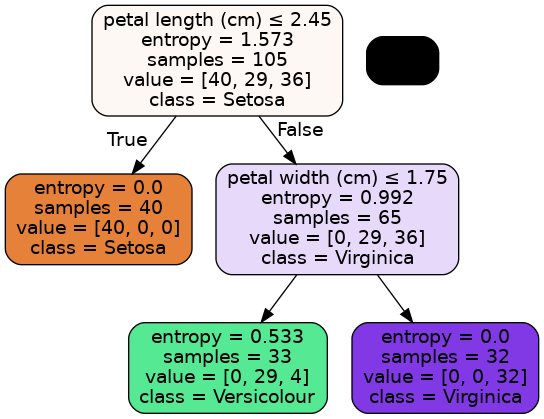

In [22]:
target_names  = ['Setosa', 'Versicolour', 'Virginica']

dot_data = StringIO()

export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,
                feature_names = X.columns,
                class_names   = target_names)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

#graph.write_png('iris.png')
Image(graph.create_png())

This pruned model is less complex, explainable, and easy to understand than the previous decision tree model plot.

---

### Pros

Decision trees are easy to interpret and visualize.
It can easily capture Non-linear patterns.
It requires fewer data preprocessing from the user, for example, there is **no need to normalize columns**.
It can be used for feature engineering such as predicting missing values, suitable for variable selection.
The decision tree has no assumptions about distribution because of the non-parametric nature of the algorithm. (Source)

### Cons

Sensitive to noisy data. It can overfit noisy data.
The small variation(or variance) in data can result in the different decision tree. This can be reduced by **bagging and boosting** algorithms.
Decision trees are biased with imbalance dataset, so it is recommended that balance out the dataset before creating the decision tree.

### Conclusion

Congratulations, you have made it to the end of this tutorial!

In this tutorial, you covered a lot of details about Decision Tree; It's working, attribute selection measures such as Information Gain, Gain Ratio, and Gini Index, decision tree model building, visualization and evaluation on dataset using Python Scikit-learn package. Also, discussed its pros, cons, and optimizing Decision Tree performance using parameter tuning.

Hopefully, you can now utilize the Decision tree algorithm to analyze your own datasets.

## Exercícios:


1.   Utilizando o Dataset *Breast_Cancer*, crie um classificador Decision Tree.
1.   Avalie a acurácia do modelo para os parâmetros default.
1.   Plote o classificador Decision Tree gerado. Você acha que a árvore está muito grande?
1.   Agora faça o "prune" da Decision Tree para usar critério `Entropy` e profundidade máxima `3`. Treine o classificador novamente e Compare o resultado atual com o anterior. Plote a nova árvore gerada.
1.   (*) Agora crie outro um classificador usando KNN e compare as métricas (acurácia, Recall, Precision, F1) dos resultados com o classificador de árvore de decisão.

## Resolução
Referência: https://www.kaggle.com/datasets/nancyalaswad90/breast-cancer-dataset/data

In [34]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nancyalaswad90/breast-cancer-dataset", path='data.csv')

print("Path to dataset files:", path)

Path to dataset files: C:\Users\srsouza\.cache\kagglehub\datasets\nancyalaswad90\breast-cancer-dataset\versions\4\data.csv


In [35]:
path

'C:\\Users\\srsouza\\.cache\\kagglehub\\datasets\\nancyalaswad90\\breast-cancer-dataset\\versions\\4\\data.csv'

## Análise do Breast Cancer Dataset 

In [36]:
dataset = pd.read_csv(path)

In [37]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [38]:
dataset.shape

(569, 32)

In [39]:
dataset.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Variável alvo: diagnosis

In [40]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Não há dados faltantes

### Verificando variável alvo

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Diagnosis proportion in dataset')

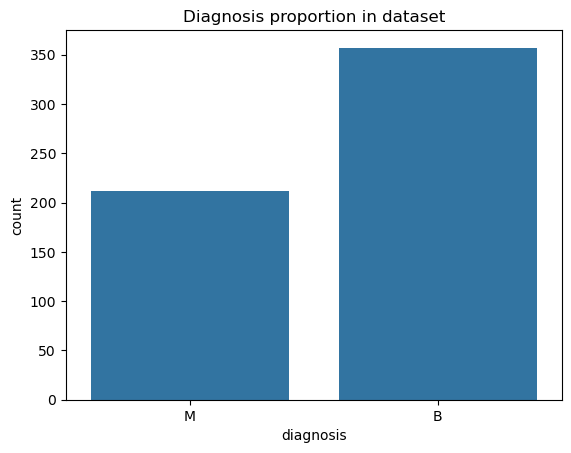

In [42]:
sns.countplot(data=dataset, x="diagnosis")
plt.title("Diagnosis proportion in dataset")

## Separando os dados para treino e teste

In [43]:
X = dataset.loc[:, dataset.columns != 'diagnosis']

y = dataset['diagnosis']

In [44]:
X.sample(5)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
547,922840,10.26,16.58,65.85,320.8,0.08877,0.08066,0.04358,0.02438,0.1669,...,10.83,22.04,71.08,357.4,0.1461,0.2246,0.1783,0.08333,0.2691,0.09479
256,88649001,19.55,28.77,133.60,1207.0,0.09260,0.20630,0.17840,0.11440,0.1893,...,25.05,36.27,178.60,1926.0,0.1281,0.5329,0.4251,0.19410,0.2818,0.10050
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.45,26.40,166.10,2027.0,0.1410,0.2113,0.4107,0.22160,0.2060,0.07115
193,875263,12.34,26.86,81.15,477.4,0.10340,0.13530,0.10850,0.04562,0.1943,...,15.65,39.34,101.70,768.9,0.1785,0.4706,0.4425,0.14590,0.3215,0.12050
10,845636,16.02,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,...,19.19,33.88,123.80,1150.0,0.1181,0.1551,0.1459,0.09975,0.2948,0.08452


In [45]:
y.sample(5)

529    B
41     M
83     M
370    M
72     M
Name: diagnosis, dtype: object

In [46]:
# 70% training and 30% test
X_train, X_test, \
y_train, y_test = train_test_split(X, y, test_size=0.3)

In [47]:
print('Original: ', X.shape, y.shape,
      '\nTrain:    ',  X_train.shape, y_train.shape,
      '\nTest:      ', X_test.shape, y_test.shape
)

Original:  (569, 31) (569,) 
Train:     (398, 31) (398,) 
Test:       (171, 31) (171,)


## Construindo o modelo de árvore de decisão

Criando o modelo 

In [48]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

Treinando o modelo com os dados de treino

In [49]:
# Train Decision Tree Classifer
clf.fit(X_train, y_train)

DecisionTreeClassifier()

Fazendo a estimativa

In [50]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

## Avaliando o modelo

Verificando a acurácia das estimativas

In [51]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, clf.predict(X_test)))

Accuracy: 0.9239766081871345


## Visualizando a árvore de decisão

In [52]:
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO
from six import StringIO

from IPython.display import Image
import pydotplus

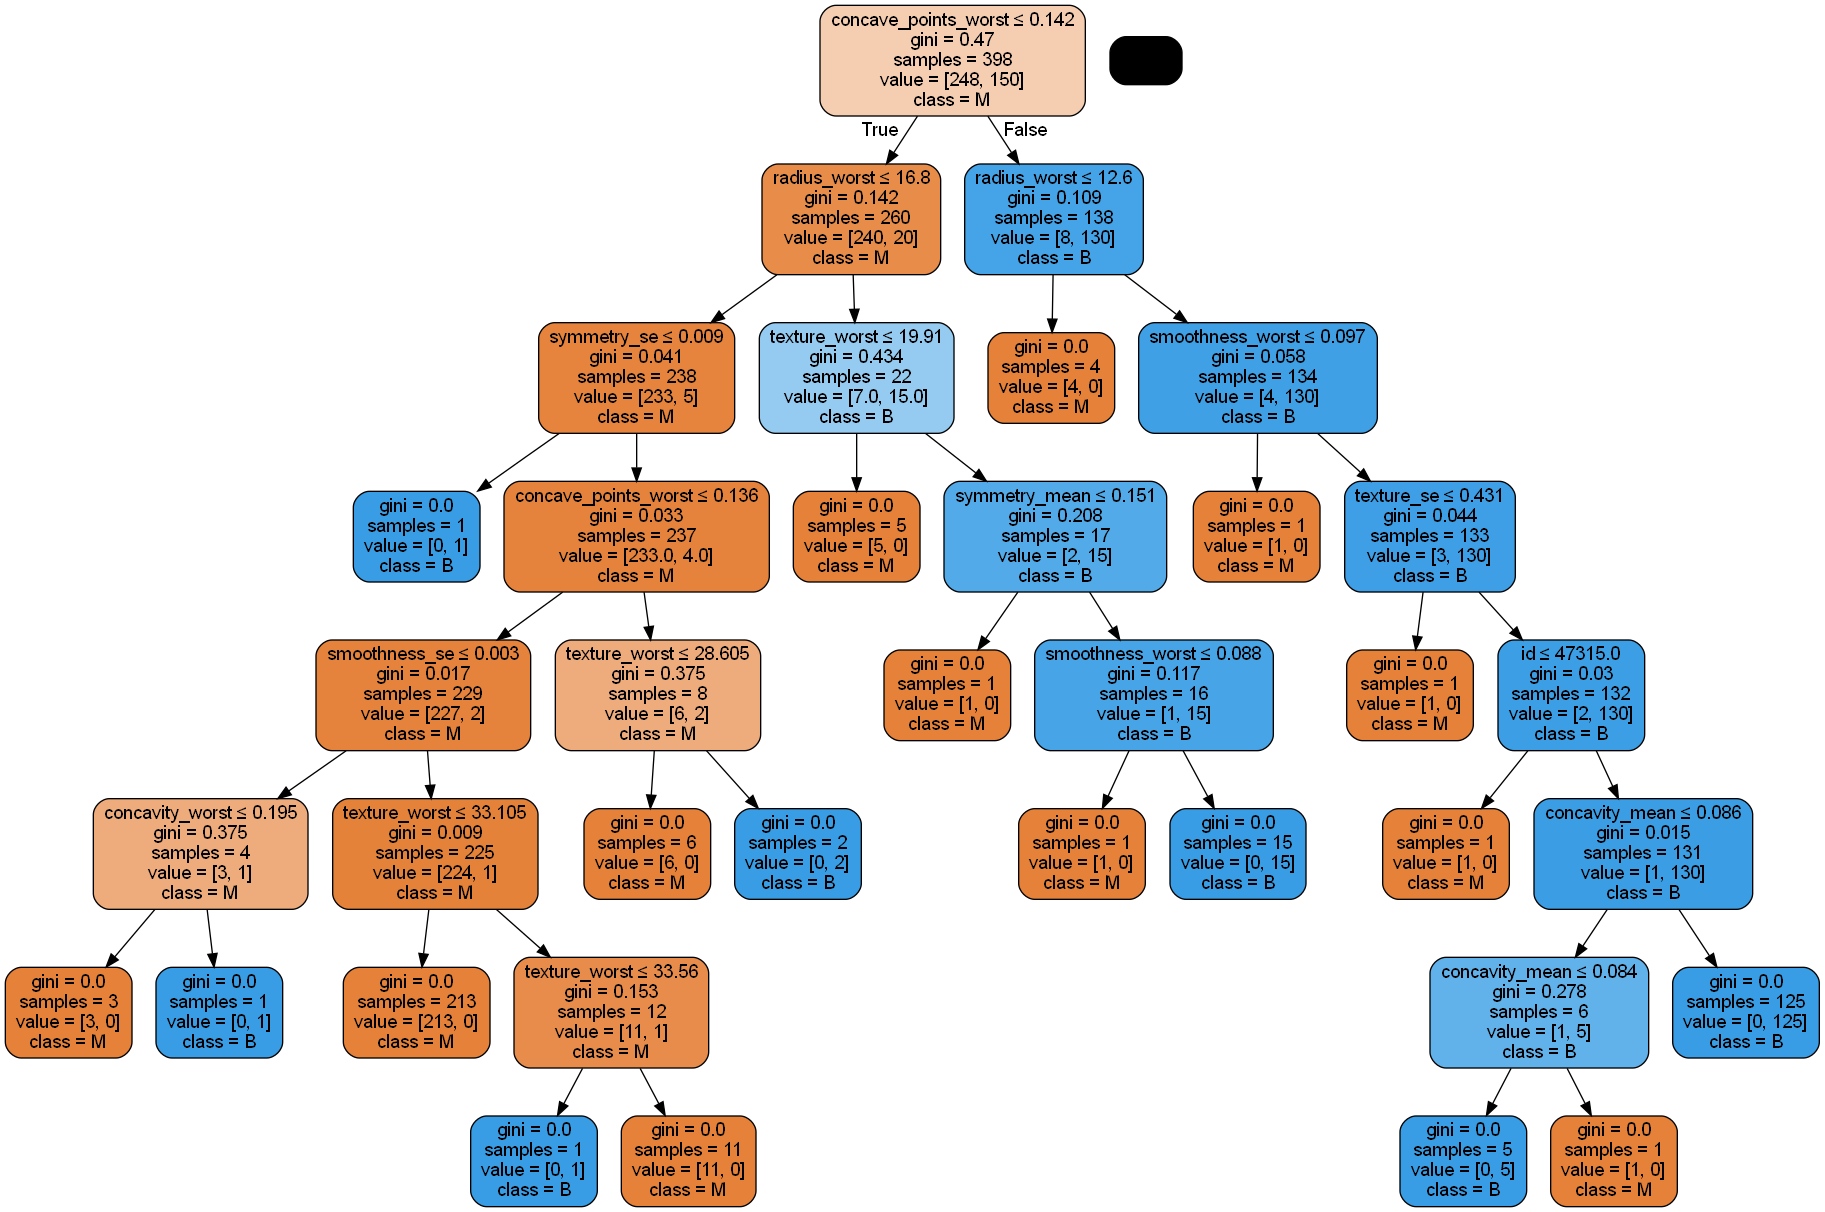

In [53]:
target_names  = ['M', 'B']

dot_data = StringIO()

export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,
                feature_names = X.columns,
                class_names   = target_names)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

#graph.write_png('Breast.png')
Image(graph.create_png())

## Otimizando o modelo

In [54]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=2)

# Train Decision Tree Classifer
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9298245614035088


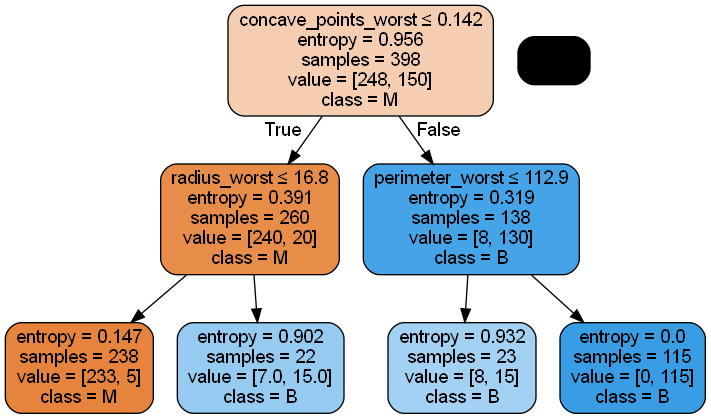

In [55]:
target_names  = ['M', 'B']

dot_data = StringIO()

export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,
                feature_names = X.columns,
                class_names   = target_names)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

#graph.write_png(''Breast.png'')
Image(graph.create_png())

Trabalhar no dado do cancer com KNN também.
